In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
dataframe_names = [
    'user_friends',
    'user_taggedartists',
    'artists',
    'tags',
    'user_artists']

file_names = [
    'data/user_friends.dat',
    'data/user_taggedartists.dat',
    'data/artists.dat',
    'data/tags.dat',
    'data/user_artists.dat']

In [3]:
for (dataframe, file) in zip(dataframe_names, file_names):
    if dataframe == 'tags':
        vars()[dataframe] = pd.read_table(file, sep="\t", encoding = "latin-1")
    else:
        vars()[dataframe] = pd.read_table(file, sep="\t")

# Exploring the Users' Friends Dataset

In [ ]:
users_friends_count = (
    user_friends
    .groupby('userID', as_index=False)
    .agg({'friendID': ['count']})
)

In [ ]:
users_friends_count.columns = ['userID', 'count_friends']

In [ ]:
mean = str(users_friends_count['count_friends'].mean())
min = str(users_friends_count['count_friends'].min())
max = str(users_friends_count['count_friends'].max())

print('The average number of friends each user has is ' + mean + ' friends')
print('The user with the least amount of friends has ' + min + ' friends')
print('The user with the most amount of friends has ' + max + ' friends')

In [ ]:
data = users_friends_count['count_friends']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=120, edgecolor='black')
plt.gca().set(
    title='Distribution of Number of Friends per User', 
    xlabel='Number of Friends',
    ylabel='Frequency'
);

As you can see in the above chart, over 60% of the users in this dataset have between 0 and 10 friends. Only ~15% of users have between 10 and 20 friends. 

We can also conclude that only less than 25% of users have over 20 friends. This is useful to know, as this would imply that a recommender system based off a user's friends' favourite artists alone may not perform accurately.

Although using friends' liked artists as a sole method to recommend songs will not perform well, it might be useful to put a slightly larger weight on their friends' artists, as long as they have a similar taste in music.

# Exploring Users' Tagged Artists

In [ ]:
tagged_artists_users = (
    user_taggedartists
    .groupby('artistID', as_index=False)
    .agg({'userID': ['count']})
)

tagged_artists_users = (
    user_taggedartists
    .groupby('artistID', as_index=False)
    .agg({'userID': lambda x: x.nunique()})
)

In [ ]:
tagged_artists_users.columns = ['artistID', 'count_users']

In [ ]:
mean = str(tagged_artists_users['count_users'].mean())
min = str(tagged_artists_users['count_users'].min())
max = str(tagged_artists_users['count_users'].max())

print('The average artist has been assigned a tag from ' + mean + ' users')
print('The user with the least amount of of users assigning tags has ' + min + ' user(s)')
print('The user with the most amount users assigning tags has ' + max + ' users')

In [ ]:
data = tagged_artists_users['count_users']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=200)
plt.gca().set(
    title='Distribution of Number of Users assigning Tags per Artist', 
    xlabel='Number of Users',
    ylabel='Frequency'
);

The plot above shows that there are very few artists that have over 50 users assigning tags.

In [ ]:
tagged_artists_users[tagged_artists_users['count_users']>=50].count()

There are 55 artists who have been assigned tags from over 50 users. This suggests that there isn't a mistaken outlier, and that the data is just very sparse (just over 1%) after reaching 50 users.

In [ ]:
tagged_artists_tags.columns = ['artistID', 'count_tags']

In [ ]:
mean = str(tagged_artists_tags['count_tags'].mean())
min = str(tagged_artists_tags['count_tags'].min())
max = str(tagged_artists_tags['count_tags'].max())

print('The average artist has been assigned ' + mean + ' tags')
print('The user with the least amount of tags has ' + min + ' tag(s)')
print('The user with the most amount tags has ' + max + ' tags')

In [ ]:
data = tagged_artists_tags['count_tags']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=300)
plt.gca().set(
    title='Distribution of Number of Tags assigned to each Artist', 
    xlabel='Number of Tags',
    ylabel='Frequency'
);

The above graph shows that over 25% of artists have received only 1 unique tag. 

The frequency of tags seems to be very close to 0 when the number of tags is greater than 75.

In [ ]:
tagged_artists_tags[tagged_artists_tags['count_tags']<=5].count()

Only 81 (0.65%) of the artists have greater than 75 unique tags assigned to them. 

In fact, over half of the artists have been assigned between 1 and 5 unique tags.

These tags will allow for a more complex recommendation to be made to a user.

# Exploring the Artists and Tags Dataset

In [ ]:
artists.head()

In [ ]:
tags.head()

The artists and tags datasets are just a reference table to expand on the artist details or the tag details. 

This does not require any more investigation, as there are no relevant data points to be used in our recommender system.

## Exploring Users' Liked Artists

In [ ]:
user_artists

In [4]:
distribution_of_weights_given = (
    user_artists
    .groupby('weight', as_index=False)
    .agg({'userID': ['count']})
)

In [5]:
distribution_of_weights_given.columns = ['weight', 'users_count']

In [ ]:
data = distribution_of_weights_given['users_count']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=200)
plt.gca().set(
    title='Distribution of Weights ', 
    xlabel='Number of Users',
    ylabel='Frequency'
);

In [ ]:
user_artists['weight']

In [6]:
list_of_weights = np.asarray(user_artists['weight'])

In [7]:
max(list_of_weights)

352698

In [ ]:
list_of_weights

In [ ]:
plt.hist(list_of_weights)

In [8]:
list_of_weights.sort()

In [9]:
list_of_weights

array([     1,      1,      1, ..., 320725, 324663, 352698], dtype=int64)

In [10]:
len(list_of_weights)

92834

Assume a normal distribution for the people that like artists

In [12]:
list_of_weights.mean()

745.2439300256372

(array([8.1435e+04, 6.8300e+03, 1.9950e+03, 8.8700e+02, 4.6700e+02,
        2.6300e+02, 1.7500e+02, 1.0900e+02, 9.2000e+01, 8.4000e+01,
        6.0000e+01, 4.6000e+01, 3.5000e+01, 4.2000e+01, 3.0000e+01,
        1.6000e+01, 1.7000e+01, 2.0000e+01, 1.7000e+01, 1.4000e+01,
        1.8000e+01, 7.0000e+00, 1.4000e+01, 9.0000e+00, 9.0000e+00,
        9.0000e+00, 9.0000e+00, 7.0000e+00, 7.0000e+00, 7.0000e+00,
        5.0000e+00, 4.0000e+00, 3.0000e+00, 5.0000e+00, 5.0000e+00,
        2.0000e+00, 1.0000e+00, 6.0000e+00, 4.0000e+00, 0.0000e+00,
        5.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

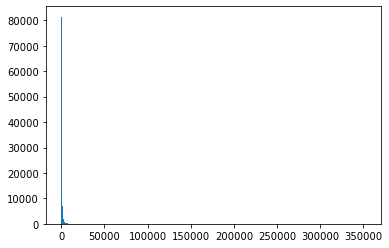

In [17]:
plt.hist(list_of_weights, bins=300)

Let's find out what proportion of people's weights are under 10,000

In [19]:
user_artists[user_artists['weight']<=10000].count()/92834

userID      0.993214
artistID    0.993214
weight      0.993214
dtype: float64

99.32% of people are under 10,000 listens

In [37]:
user_artists[user_artists['weight']<=2328].count()/92834

userID      0.950008
artistID    0.950008
weight      0.950008
dtype: float64

95% of the users listen to artists under 2328 times

In [38]:
user_artists[user_artists['weight']<=2328]

,userID,artistID,weight
0,2,51,1
1,2,52,1
2,2,53,1
3,2,54,1
4,2,55,1
...,...,...,...
88188,1996,475,2327
88189,1996,527,2327
88190,1996,569,2327
88191,1996,572,2328


(array([17759., 14407., 11094.,  8422.,  6262.,  4968.,  3828.,  3172.,
         2543.,  2116.,  1794.,  1360.,  1223.,  1258.,  1077.,   899.,
          749.,   714.,   624.,   575.,   536.,   416.,   409.,   356.,
          292.,   324.,   255.,   266.,   257.,   238.]),
 array([1.00000000e+00, 7.85666667e+01, 1.56133333e+02, 2.33700000e+02,
        3.11266667e+02, 3.88833333e+02, 4.66400000e+02, 5.43966667e+02,
        6.21533333e+02, 6.99100000e+02, 7.76666667e+02, 8.54233333e+02,
        9.31800000e+02, 1.00936667e+03, 1.08693333e+03, 1.16450000e+03,
        1.24206667e+03, 1.31963333e+03, 1.39720000e+03, 1.47476667e+03,
        1.55233333e+03, 1.62990000e+03, 1.70746667e+03, 1.78503333e+03,
        1.86260000e+03, 1.94016667e+03, 2.01773333e+03, 2.09530000e+03,
        2.17286667e+03, 2.25043333e+03, 2.32800000e+03]),
 <BarContainer object of 30 artists>)

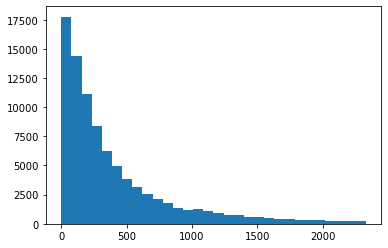

In [45]:
plt.hist(user_artists[user_artists['weight']<=2328]['weight'], bins = 30)

In [42]:
user_artists[user_artists['weight']<=2328]['weight']

0           1
1           1
2           1
3           1
4           1
         ... 
88188    2327
88189    2327
88190    2327
88191    2328
88192    2328
Name: weight, Length: 88193, dtype: int64

In [47]:
user_artists

,userID,artistID,weight
0,2,51,1
1,2,52,1
2,2,53,1
3,2,54,1
4,2,55,1
...,...,...,...
92829,2100,18726,227829
92830,2100,18727,257978
92831,2100,18728,320725
92832,2100,18729,324663


In [51]:
userIDs = np.asarray(user_artists['userID'])

In [52]:
userIDs

array([   2,    2,    2, ..., 2100, 2100, 2100], dtype=int64)

In [55]:
len(set(userIDs))

1892

There are 1,892 users in this dataset